In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")
import random

In [2]:
river='Thames_R'

location = (42.393733, -82.212676)

In [7]:
WSC_STATIONS = pd.read_pickle('../Loadings Canada 2/data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('../Loadings Canada 2/data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

# PWQMN = pd.read_pickle('../Loadings Canada 2/data/PWQMN')

# elem = 'CHLORIDE,         UNFIL.REAC'
# PWQMN = PWQMN[(PWQMN["PARM DESCRIPTION"]==elem) & (PWQMN.UNITS!='FORMAZIN TURBIDITY UNIT')]
# # PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000

# PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

# GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

# elem_name='Chloride dissolved'

# GLNI = GLNI[GLNI.VariableCommonName==elem_name]

# GLNI.SiteName.unique()

delta = 5
near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
                     (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]


Flow_IDS = [[st, False] for st in near_stations.STATION_NUMBER.unique()] 

# near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
#                      (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


# near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
#                      (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

# near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

# near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


# PWQMN_IDS = [[st, False] for st in set(PWQMN.STATION.unique()).intersection(near_pwqmn_stations.STATION.unique())]

# all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


# near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

# all_near_stations = pd.concat([near_stations, near_pwqmn_stations, near_glni_stations])



In [8]:
Flow_IDS

[['02FD002', False],
 ['02FE002', False],
 ['02FE003', False],
 ['02FE005', False],
 ['02FE007', False],
 ['02FE008', False],
 ['02FE009', False],
 ['02FE010', False],
 ['02FE011', False],
 ['02FE013', False],
 ['02FE014', False],
 ['02FE015', False],
 ['02FE016', False],
 ['02FE017', False],
 ['02FF002', False],
 ['02FF004', False],
 ['02FF007', False],
 ['02FF008', False],
 ['02FF009', False],
 ['02FF011', False],
 ['02FF012', False],
 ['02FF013', False],
 ['02FF014', False],
 ['02FF015', False],
 ['02FF016', False],
 ['02GA003', False],
 ['02GA005', False],
 ['02GA006', False],
 ['02GA010', False],
 ['02GA014', False],
 ['02GA015', False],
 ['02GA016', False],
 ['02GA018', False],
 ['02GA023', False],
 ['02GA024', False],
 ['02GA028', False],
 ['02GA029', False],
 ['02GA030', False],
 ['02GA031', False],
 ['02GA034', False],
 ['02GA038', False],
 ['02GA039', False],
 ['02GA040', False],
 ['02GA042', False],
 ['02GA043', False],
 ['02GA044', False],
 ['02GA045', False],
 ['02GA046', 

In [9]:
Show_IDS = [[st, False] for st in all_near_stations.STATION.unique()] 

NameError: name 'all_near_stations' is not defined

In [10]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all Flow
# for index, st_dic in enumerate(Flow_IDS):
#     st = st_dic[0]
# #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# #     if N>10:
#     st_df = near_stations[near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=st_df.STATION.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)



# # show all
if 1:
#     for index, st_dic in enumerate(PWQMN_IDS):
#         st = st_dic[0]
#     # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     # #     if N>10:
#         st_df = near_pwqmn_stations[near_pwqmn_stations.STATION == st]
#         folium.Marker(location=[st_df.LATITUDE.values[0], 
#                                 st_df.LONGITUDE.values[0]], 
#                                   popup=folium.Popup(html=str(st_df.STATION.values[0]),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)
#     for index, st_dic in enumerate(GLNI_IDS):
#         st = st_dic[0]
#     # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     # #     if N>10:
#         st_df = near_glni_stations[near_glni_stations.STATION == st]
#         folium.Marker(location=[st_df.LATITUDE.values[0], 
#                                 st_df.LONGITUDE.values[0]], 
#                                   popup=folium.Popup(html=str(st_df.STATION.values[0]),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='green')
#                      ).add_to(m)
    for index, st_dic in enumerate(Flow_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_stations[near_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='red')
                     ).add_to(m)
else:
    Show_IDS = [
    [4001308202, False],
    [4001300782, False],
    [4001305802, True],
    ["ON02GE1000", True],
    ["02GE003", True],
    ]



    for index, st_dic in enumerate(Show_IDS):
        st = st_dic[0]
        print(st)
        if st_dic[1]:
            clr='#f44242'
        else:
            clr='#0b15c4'
        coef_r = 3
        a,b = random.randrange(-100, 100, 1)*1e-5*coef_r, random.randrange(-100, 100, 1)*1e-5*coef_r
        st_df = all_near_stations[all_near_stations.STATION == st]
        folium.CircleMarker(location=[st_df.LATITUDE.values[0]+a, 
                                st_df.LONGITUDE.values[0]+b], radius=23, 
                            fill=True, fill_color='white',
                                color = clr,fill_opacity=1,
                           weight=5).add_to(m)
        if not index+1 in [1,4]:
            folium.map.Marker(
#         location=[st_df.LATITUDE.values[0]+0.0235+a,st_df.LONGITUDE.values[0]-0.1026+b], # 10 km
        location=[st_df.LATITUDE.values[0]+0.0135+a,st_df.LONGITUDE.values[0]-0.0526+b], # 5km
#         location=[st_df.LATITUDE.values[0]+0.0065+a,st_df.LONGITUDE.values[0]-0.026+b], # 2km
#         location=[st_df.LATITUDE.values[0]+0.0031+a,st_df.LONGITUDE.values[0]-0.013+b], # 1km
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
                )
            ).add_to(m)




m







In [15]:
selected_stations = [s[0] for s in Show_IDS]

In [16]:
TP_1 = PWQMN[PWQMN.STATION.isin(selected_stations)][['DATE', 'RESULT','STATION']]
TP_1['RESULT'] = pd.to_numeric(TP_1['RESULT'])
# TP_1['RESULT'] = TP_1['RESULT']*(TP_1['RESULT']<20)

TP_2 = GLNI[GLNI.SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_2 = TP_2[['SampleDateTime', 'Value', 'SiteCode']]
TP_2 = TP_2.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})

TP = pd.concat([TP_1, TP_2])


TP['RESULT'] = pd.to_numeric(TP['RESULT'])

pt = sns.color_palette("colorblind", len(selected_stations))



In [17]:
PWQMN[PWQMN.UNITS=='FORMAZIN TURBIDITY UNIT']['PARM DESCRIPTION']

Series([], Name: PARM DESCRIPTION, dtype: object)

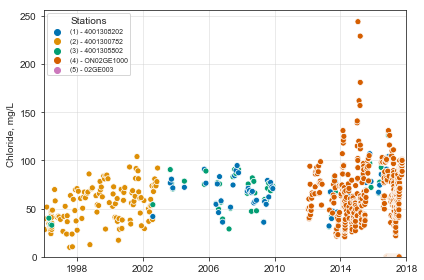

In [18]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(x='DATE', y='RESULT', data=TP, hue_order=selected_stations, hue='STATION', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl_meas.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl_meas.pdf')



In [19]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
      

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &    min &    25\% &    50\% &    75\% &    max \\
STATION    &        &        &        &        &        &        &        &        \\
\midrule
4001308202 &   67.0 &  67.71 &  19.50 &  28.30 &  55.20 &  68.20 &  79.95 &  107.0 \\
4001300782 &  145.0 &  52.72 &  19.43 &   9.80 &  38.20 &  52.90 &  67.40 &  104.0 \\
4001305802 &   70.0 &  65.43 &  20.78 &  28.90 &  48.15 &  67.15 &  78.45 &  126.0 \\
ON02GE1000 &  495.0 &  61.23 &  31.85 &   0.01 &  41.65 &  60.50 &  81.20 &  244.0 \\
02GE003    &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
\bottomrule
\end{tabular}



In [20]:
selected_stations

[4001308202, 4001300782, 4001305802, 'ON02GE1000', '02GE003']

In [21]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = TP[TP.STATION.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(565, 4)

In [22]:
master_st_df.DATE = master_st_df[master_st_df.DATE>datetime.datetime(1995,12,31)].DATE.dt.date
# = pd.to_date(master_st_df.DATE, format="%Y-%m-%d")
# master_st_df

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
master_st_df[[
    'DATE','USGSPCode', 'RESULT']].groupby('DATE').mean().reset_index().sort_values('DATE').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)

### Discharge

In [98]:
river

'Thames_R'

In [146]:
site = '02GE003'
discharge = WSC_FLOWS[WSC_FLOWS.index>datetime.datetime(1996,1,1)][site].to_frame()

discharge = discharge.reset_index()
discharge = discharge.rename(index=str, columns={site:'Discharge, cms', 'index':'Date'})
discharge['Source'] = site

discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028

In [33]:
discharge = pd.read_excel('../../measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx', sheet_name='discharge_cms')



for c in discharge.columns:
    discharge = discharge.rename(
        index=str, columns={c: c.lower().strip()})

discharge['Date'] = pd.to_datetime(discharge[['year', 'month', 'day']])

discharge = discharge[['Date', 'thames_r']]


discharge['Discharge, cms']  = discharge['thames_r']
discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028

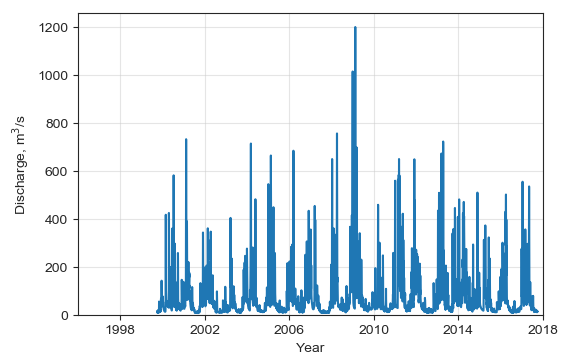

In [34]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge,ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


# ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site)], loc='best', fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Q.pdf')

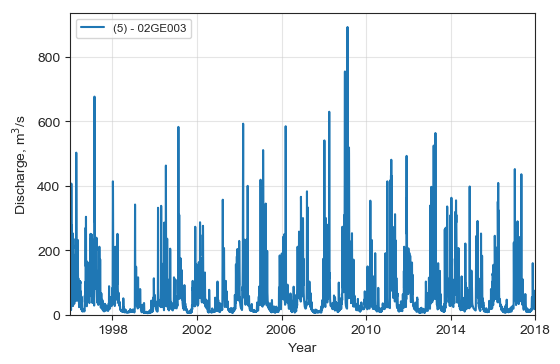

In [154]:
# fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
# ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


# ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site)], loc=2, fontsize='small')
# ax.set_ylim(0,None)
# ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
# ax.grid(alpha=0.5)
# ax.set_ylabel("Discharge, m$^3$/s")
# ax.set_xlabel("Year")

# # axins = zoomed_inset_axes(ax, 8, loc='upper center')
# # sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# # axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# # axins.set_ylim(0, 10) # apply the y-limits
# # plt.yticks(visible=False)
# # plt.xticks(visible=False)
# # from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# # mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Q.pdf')

In [43]:
discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


### Egret

In [44]:
river

'Thames_R'

In [45]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


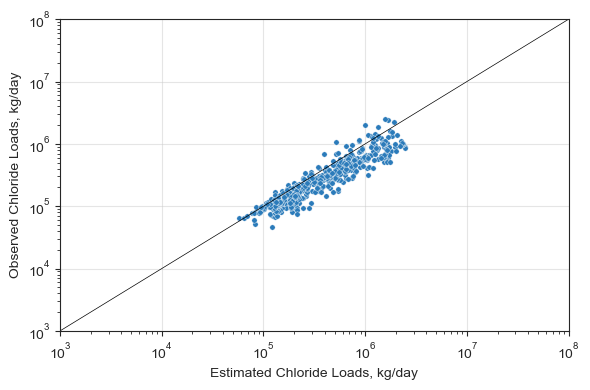

In [46]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
min_lim, max_lim = 1e3, 1e8
plt.xlim(min_lim,max_lim)
plt.ylim(min_lim,max_lim)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_FvsF.pdf')


In [47]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,2000,183.5,66.241662,54876.5,6.513661,183.500000,2000.248661,1803.497268,183.5,3.733307,66.349362,67.967158,4.214225,0.146726,71.022793,343907.342898,66.356434,340319.562630,125526.180158,18787.293124
1,2001,549.0,59.483722,55242.0,6.526027,183.838356,2001.248146,1815.501370,549.0,3.538151,60.257548,62.248266,4.141418,0.150632,65.459825,269635.966234,65.481039,326644.448539,98417.127676,14717.585900
2,2002,914.0,69.534179,55607.0,6.526027,183.838356,2002.248059,1827.501370,914.0,3.813315,69.534427,69.496701,4.108671,0.148303,63.330246,323528.023869,64.610200,315172.534977,118087.728712,17696.926685
3,2003,1279.0,38.710777,55972.0,6.526027,183.838356,2003.248059,1839.501370,1279.0,3.161131,38.667453,38.637670,4.254316,0.141174,73.460885,184943.043847,63.576573,300914.179926,67504.211004,9872.779582
4,2004,1644.5,78.894779,56337.5,6.513661,183.500000,2004.248661,1851.497268,1644.5,3.867441,78.960846,78.974673,4.040701,0.147096,60.224598,302643.427054,62.501985,287848.060302,110464.850875,16881.931103
5,2005,2010.0,67.498610,56703.0,6.526027,183.838356,2005.248146,1863.501370,2010.0,3.610141,67.403656,67.363940,4.115286,0.143234,64.502804,246582.748002,63.527395,266383.263490,90002.703021,13197.797360
6,2006,2375.0,64.363060,57068.0,6.526027,183.838356,2006.248059,1875.501370,2375.0,3.674953,64.217717,63.446298,4.095635,0.144744,63.178465,257699.395690,62.451733,278696.216699,94060.279427,14547.516543
7,2007,2740.0,76.362694,57433.0,6.526027,183.838356,2007.248059,1887.501370,2740.0,3.721880,76.603749,77.505468,4.108114,0.143518,64.428166,308201.379801,63.734117,273150.113484,112493.503627,17668.382657
8,2008,3105.5,71.732755,57798.5,6.513661,183.500000,2008.248661,1899.497268,3105.5,3.657144,71.679567,70.796036,4.122405,0.154535,65.331896,282015.196837,63.470423,290489.929060,102935.546845,19822.750271
9,2009,3471.0,119.075417,58164.0,6.526027,183.838356,2009.248146,1911.501370,3471.0,4.184122,119.057915,119.737238,3.937139,0.200804,55.119999,388530.095591,64.199547,290218.632002,141813.484891,35248.529970


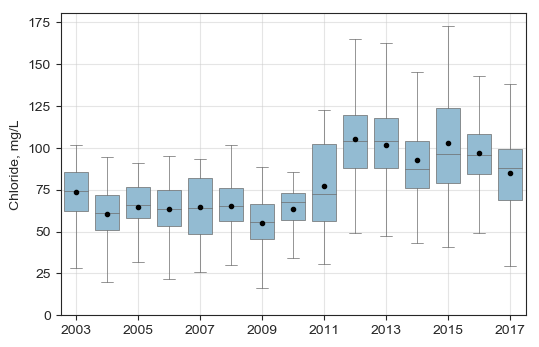

In [48]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2018))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl.pdf')



In [49]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




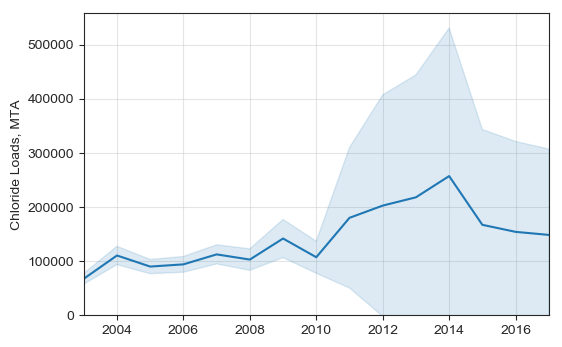

In [50]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.ylim(0,None)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl_Flux.pdf')


In [51]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
      3  &        4  &       5  &       6  &        7  &        8  &        9  &        10 &        11 &        12 &        13 &        14 &        15 &        16 &        17 \\
\midrule
  2003.0 &    2004.0 &   2005.0 &   2006.0 &    2007.0 &    2008.0 &    2009.0 &    2010.0 &    2011.0 &    2012.0 &    2013.0 &    2014.0 &    2015.0 &    2016.0 &    2017.0 \\
 67504.2 &  110464.9 &  90002.7 &  94060.3 &  112493.5 &  102935.5 &  141813.5 &  107243.6 &  180042.6 &  202631.7 &  217935.7 &  257158.9 &  167141.3 &  154112.7 &  148501.5 \\
  9872.8 &   16881.9 &  13197.8 &  14547.5 &   17668.4 &   19822.8 &   35248.5 &   29595.8 &  129635.1 &  204554.9 &  226137.9 &  273446.9 &  176204.3 &  167004.5 &  158610.5 \\
\bottomrule
\end{tabular}



In [52]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
   

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &    min &    25\% &    50\% &    75\% &    max \\
STATION    &        &        &        &        &        &        &        &        \\
\midrule
4001308202 &   67.0 &  67.71 &  19.50 &  28.30 &  55.20 &  68.20 &  79.95 &  107.0 \\
4001300782 &  145.0 &  52.72 &  19.43 &   9.80 &  38.20 &  52.90 &  67.40 &  104.0 \\
4001305802 &   70.0 &  65.43 &  20.78 &  28.90 &  48.15 &  67.15 &  78.45 &  126.0 \\
ON02GE1000 &  495.0 &  61.23 &  31.85 &   0.01 &  41.65 &  60.50 &  81.20 &  244.0 \\
02GE003    &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
\bottomrule
\end{tabular}

